In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This project is an Exploratory Data Analysis for Housing Data extracted from realtor.ca using Web scraping. I used web scraping to extract the address, price, number of rooms, number of bathrooms, property type, building type, storeys, community name, title, annual property taxes (in CAD), parking type, property type for houses near Richmond Hill Ontario. (https://www.realtor.ca/map#ZoomLevel=12&Center=43.903631%2C-79.428110&LatitudeMax=44.00682&LongitudeMax=-79.15620&LatitudeMin=43.80027&LongitudeMin=-79.70002&view=list&Sort=6-D&PGeoIds=g30_dpz9b86g&GeoName=Richmond%20Hill%2C%20ON&PropertyTypeGroupID=1&PropertySearchTypeId=1&TransactionTypeId=2&Currency=CAD) .
If I were to get all the data at once, we ran into complications as the website had a bot proof verification, so I had to split up the data collection process into 7 different datasets. I will be cleaning the data, doing some feature engineering, and will be making an interactive dashboard to present my findings. 

# Importing the Data

In [3]:
df_realtor0 = pd.read_csv('/content/gdrive/My Drive/realtor.ca/realtor0-850000.csv')
df_realtor1 = pd.read_csv('/content/gdrive/My Drive/realtor.ca/realtor850000-1200000.csv')
df_realtor2 = pd.read_csv('/content/gdrive/My Drive/realtor.ca/realtor1200000-1500000.csv')
df_realtor3 = pd.read_csv('/content/gdrive/My Drive/realtor.ca/realtor1500000-1800000.csv')
df_realtor4 = pd.read_csv('/content/gdrive/My Drive/realtor.ca/realtor1800000-2500000.csv')
df_realtor5 = pd.read_csv('/content/gdrive/My Drive/realtor.ca/realtor2500000-3500000.csv')
df_realtor6 = pd.read_csv('/content/gdrive/My Drive/realtor.ca/realtor3500000-5000000.csv')

Combining the 7 datasets into one big dataset as the datasets have identical columns. 

In [4]:
df_realtor = pd.concat([df_realtor0, df_realtor1, df_realtor2, df_realtor3, df_realtor4, df_realtor5, df_realtor6], ignore_index=True)

In [5]:
df_realtor.shape

(1063, 16)

Now that the dataset is combined and loaded into the pandas dataframe, we may start looking for missing values and proceed with the Data Cleaning Process.

# Data Cleaning

We would often perform EDA before the cleaning process, but this data is dirty in a sense that the datatype of price is a string, for example. Would be difficult to explore the data with these complications. We clean the data first,change the datatype, explore the data, perform feature engineering, then to summarize our findings.

In [6]:
df_realtor.isna().sum()

web-scraper-order           0
web-scraper-start-url       0
nextpage                 1063
link                        0
link-href                   0
address                     5
price                       5
num_rooms                  58
num_bath                   27
Property Type               5
Building Type              62
storeys                   308
Community Name             14
Title                      73
Annual Property Taxes      14
Parking Type              115
dtype: int64

In [7]:
df_realtor.head()

,web-scraper-order,web-scraper-start-url,nextpage,link,link-href,address,price,num_rooms,num_bath,Property Type,Building Type,storeys,Community Name,Title,Annual Property Taxes,Parking Type
0,1634702012-570,https://www.realtor.ca/map#ZoomLevel=12&Center...,NaN,"MLS®: E5358167 $535,000 ...",https://www.realtor.ca/real-estate/23595880/70...,"#708 -480 MCLEVIN AVE\nToronto, Ontario M1B5N9","$535,000",2,2.0,Single Family,Apartment,NaN,Malvern,Condominium/Strata,"$1,173.15 (CAD)","Underground, Visitor Parking"
1,1634701801-520,https://www.realtor.ca/map#ZoomLevel=12&Center...,NaN,"MLS®: N5280313 $659,999 ...",https://www.realtor.ca/real-estate/23353498/24...,"#2414 -8960 JANE ST\nVaughan, Ontario L4K2M9","$659,999",1 + 1,2.0,Single Family,Apartment,NaN,Concord,Condominium/Strata,$0 (CAD),Underground
2,1634702473-679,https://www.realtor.ca/map#ZoomLevel=12&Center...,NaN,"MLS®: N5393778 $508,000 ...",https://www.realtor.ca/real-estate/23709262/20...,"#202 -9017 LESLIE ST\nRichmond Hill, Ontario L...","$508,000",1,1.0,Single Family,Apartment,NaN,Beaver Creek Business Park,Condominium/Strata,"$1,516.97 (CAD)",Underground
3,1634702550-697,https://www.realtor.ca/map#ZoomLevel=12&Center...,NaN,"MLS®: E5396455 $475,000 ...",https://www.realtor.ca/real-estate/23716831/ph...,"#PH 11 -25 SILVER SPRINGS BLVD\nToronto, Ontar...","$475,000",1 + 1,1.0,Single Family,Apartment,NaN,L'Amoreaux,Condominium/Strata,"$1,496.98 (CAD)",Underground
4,1634701810-522,https://www.realtor.ca/map#ZoomLevel=12&Center...,NaN,"MLS®: N5297044 $599,900 ...",https://www.realtor.ca/real-estate/23407327/19...,"#1922 -8960 JANE ST\nVaughan, Ontario","$599,900",1 + 1,1.0,Single Family,Apartment,NaN,Concord,Condominium/Strata,$0 (CAD),Underground


We may safely remove the columns web-scraper-order, web-scraper-start-url,nextpage, link, link-href as they are meaningless to the housing analysis. 

In [8]:
df_realtor = df_realtor.drop(['web-scraper-order','web-scraper-start-url','nextpage','link','link-href'], axis = 1)

In [9]:
df_realtor.head()

,address,price,num_rooms,num_bath,Property Type,Building Type,storeys,Community Name,Title,Annual Property Taxes,Parking Type
0,"#708 -480 MCLEVIN AVE\nToronto, Ontario M1B5N9","$535,000",2,2.0,Single Family,Apartment,NaN,Malvern,Condominium/Strata,"$1,173.15 (CAD)","Underground, Visitor Parking"
1,"#2414 -8960 JANE ST\nVaughan, Ontario L4K2M9","$659,999",1 + 1,2.0,Single Family,Apartment,NaN,Concord,Condominium/Strata,$0 (CAD),Underground
2,"#202 -9017 LESLIE ST\nRichmond Hill, Ontario L...","$508,000",1,1.0,Single Family,Apartment,NaN,Beaver Creek Business Park,Condominium/Strata,"$1,516.97 (CAD)",Underground
3,"#PH 11 -25 SILVER SPRINGS BLVD\nToronto, Ontar...","$475,000",1 + 1,1.0,Single Family,Apartment,NaN,L'Amoreaux,Condominium/Strata,"$1,496.98 (CAD)",Underground
4,"#1922 -8960 JANE ST\nVaughan, Ontario","$599,900",1 + 1,1.0,Single Family,Apartment,NaN,Concord,Condominium/Strata,$0 (CAD),Underground


Now, we consider the columns address, price, community name, and annual property taxes. These have very little missing values compared to other ones. We can just get rid of the rows with missing values in those columns. Also, By looking through the dataset, I've noticed that there are some misleading information on the website. Some houses are listed as low as a dollar and it is inaccurate information. We can filter out the prices that are lower than $100,000.

In [10]:
df_realtor = df_realtor.drop(df_realtor[df_realtor['address'].isna()].index)
df_realtor = df_realtor.drop(df_realtor[df_realtor['price'].isna()].index)
df_realtor = df_realtor.drop(df_realtor[df_realtor['Community Name'].isna()].index)
df_realtor = df_realtor.drop(df_realtor[df_realtor['Annual Property Taxes'].isna()].index)

In [11]:
df_realtor.isna().sum()

address                    0
price                      0
num_rooms                 53
num_bath                  22
Property Type              0
Building Type             57
storeys                  302
Community Name             0
Title                     68
Annual Property Taxes      0
Parking Type             109
dtype: int64

Now, to clean the rest of the data, I took a look at the rows with missing values for number of rooms to determine why.

In [12]:
df_realtor[df_realtor['num_rooms'].isna()].head(10)

,address,price,num_rooms,num_bath,Property Type,Building Type,storeys,Community Name,Title,Annual Property Taxes,Parking Type
9,"0 HIGHWAY 50\nBrampton, Ontario L6P0V6",$1,NaN,NaN,Vacant Land,NaN,NaN,Highway 427,NaN,$0 (CAD),NaN
12,"1260 CENTRE ST\nVaughan, Ontario L4J3M9",$1,NaN,NaN,Vacant Land,NaN,NaN,Beverley Glen,NaN,"$42,877.45 (CAD)",NaN
41,"4151 HIGHWAY 7\nMarkham, Ontario L3R1L5",$1,NaN,NaN,Vacant Land,NaN,NaN,Unionville,NaN,"$21,335.69 (CAD)",NaN
43,"2265 MARKHAM RD\nToronto, Ontario M1B2W3",$1,NaN,NaN,Vacant Land,NaN,NaN,Agincourt North,NaN,"$26,049 (CAD)",NaN
46,"7760 NINTH LINE\nMarkham, Ontario L6B1A8",$1,NaN,0.0,Vacant Land,NaN,NaN,Legacy,NaN,"$3,461.33 (CAD)",NaN
48,"7768 NINTH LINE\nMarkham, Ontario L6B1A8",$1,NaN,0.0,Vacant Land,NaN,NaN,Legacy,NaN,"$1,934.83 (CAD)",NaN
60,"7790 NINTH LINE\nMarkham, Ontario L6B1A8",$1,NaN,0.0,Vacant Land,NaN,NaN,Legacy,NaN,"$1,934.83 (CAD)",NaN
66,"7782 NINTH LINE\nMarkham, Ontario L6B1A8",$1,NaN,0.0,Vacant Land,NaN,NaN,Legacy,NaN,"$1,934.83 (CAD)",NaN
84,"30-46 OLD KENNEDY RD\nMarkham, Ontario L3R5E6",$1,NaN,NaN,Vacant Land,NaN,NaN,Milliken Mills East,NaN,$1 (CAD),NaN
89,"7776 NINTH LINE\nMarkham, Ontario L6B1A8",$1,NaN,0.0,Vacant Land,NaN,NaN,Legacy,NaN,"$48,881 (CAD)",NaN


In [13]:
df_realtor[df_realtor['Property Type'] == "Vacant Land"].shape

(57, 11)

After seeing the rows with missing values for number of rooms, we notice that the Property Type for all of them are Vacant Land. Since we are interested in analyzing the housing trends, we may discard all rows with Property Type matching Vacant Land.

In [14]:
df_realtor = df_realtor.drop(df_realtor[df_realtor['Property Type'] == "Vacant Land"].index)


In [15]:
df_realtor.isna().sum()

address                    0
price                      0
num_rooms                  2
num_bath                   0
Property Type              0
Building Type              0
storeys                  246
Community Name             0
Title                     11
Annual Property Taxes      0
Parking Type              53
dtype: int64

We notice that discarding the 57 listings for Vacant Land helped alot with cleaning. Now, we only have 2 missing values for number of rooms, 246 for storeys, 11 for Title, and 53 for Parking Type. Since Title and Number of rooms have insignificant number of missing values, we will remove those rows.

In [16]:
df_realtor = df_realtor.drop(df_realtor[df_realtor['num_rooms'].isna()].index)
df_realtor = df_realtor.drop(df_realtor[df_realtor['Title'].isna()].index)

Now for the number of storeys, we mustn't discard the rows as there a significant amount of rows with missing values. It would be reasonable to replace them by the average storey height for each building type. 

In [17]:
df_realtor.groupby('Building Type').mean()

,num_bath,storeys
Building Type,,
Apartment,1.829016,2.200000
House,3.988304,1.822153
Row / Townhouse,3.298077,2.483146


The data seems strange here. Apartments are usually higher than 2 storeys and also doesnt make sense that a townhouse is taller than an apartment. After investigation, we notice that Realtor.ca usually does not provide apartment storeys information and only provides storey information for houses and townhouses. As there are misleading and incomplete data, we should remove storeys column as it does not really give important insights.

In [18]:
df_realtor = df_realtor.drop(['storeys'], axis = 1)

In [19]:
df_realtor.isna().sum()

address                   0
price                     0
num_rooms                 0
num_bath                  0
Property Type             0
Building Type             0
Community Name            0
Title                     0
Annual Property Taxes     0
Parking Type             53
dtype: int64

For parking type, we can drop the rows with missing values. There are inconsistencies in the data because some realtors do not include the parking type information on the website. 

In [20]:
df_realtor = df_realtor.drop(df_realtor[df_realtor['Parking Type'].isna()].index)

Now we have successfully dealt with the missing values in the data. Now before we proceed with feature engineering, we must first clean up the address by removing newline (\n).

In [21]:
df_realtor.head()

,address,price,num_rooms,num_bath,Property Type,Building Type,Community Name,Title,Annual Property Taxes,Parking Type
0,"#708 -480 MCLEVIN AVE\nToronto, Ontario M1B5N9","$535,000",2,2.0,Single Family,Apartment,Malvern,Condominium/Strata,"$1,173.15 (CAD)","Underground, Visitor Parking"
1,"#2414 -8960 JANE ST\nVaughan, Ontario L4K2M9","$659,999",1 + 1,2.0,Single Family,Apartment,Concord,Condominium/Strata,$0 (CAD),Underground
2,"#202 -9017 LESLIE ST\nRichmond Hill, Ontario L...","$508,000",1,1.0,Single Family,Apartment,Beaver Creek Business Park,Condominium/Strata,"$1,516.97 (CAD)",Underground
3,"#PH 11 -25 SILVER SPRINGS BLVD\nToronto, Ontar...","$475,000",1 + 1,1.0,Single Family,Apartment,L'Amoreaux,Condominium/Strata,"$1,496.98 (CAD)",Underground
4,"#1922 -8960 JANE ST\nVaughan, Ontario","$599,900",1 + 1,1.0,Single Family,Apartment,Concord,Condominium/Strata,$0 (CAD),Underground


In [22]:
df_realtor['address'] = df_realtor['address'].apply(lambda x: x.split("\n")[0] + " " + x.split("\n")[1] if len(x.split("\n")) > 1 else x)

Now, we change the columns price and Annual Property Taxes to strip the dollar sign,comma, and(CAD). Then we convert to proper datatypes.

In [23]:
df_realtor['price'] = df_realtor['price'].apply(lambda x: x.strip("$"))
df_realtor['price'] = df_realtor['price'].apply(lambda x: x.replace(",",""))
df_realtor['Annual Property Taxes'] = df_realtor['Annual Property Taxes'].apply(lambda x: x.strip("$"))
df_realtor['Annual Property Taxes'] = df_realtor['Annual Property Taxes'].apply(lambda x: x.strip("(CAD)"))
df_realtor['Annual Property Taxes'] = df_realtor['Annual Property Taxes'].apply(lambda x: x.replace(",",""))

# Changing to appropriate Data Types

Price, Number of Bathrooms, storeys, and annual property taxes need to be numeric so we change them to appropriate numeric data types. We need to also change the datatype for num_rooms, but we need to do some feature engineering first so we will leave that for now. Property type, Building Type, Title, and Parking type need to be categorical.

In [24]:
df_realtor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 1062
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   address                928 non-null    object 
 1   price                  928 non-null    object 
 2   num_rooms              928 non-null    object 
 3   num_bath               928 non-null    float64
 4   Property Type          928 non-null    object 
 5   Building Type          928 non-null    object 
 6   Community Name         928 non-null    object 
 7   Title                  928 non-null    object 
 8   Annual Property Taxes  928 non-null    object 
 9   Parking Type           928 non-null    object 
dtypes: float64(1), object(9)
memory usage: 79.8+ KB


In [25]:
df_realtor['price'] = df_realtor['price'].astype('int64')
df_realtor['num_bath'] = df_realtor['num_bath'].astype('float64')
df_realtor['Annual Property Taxes'] = df_realtor['Annual Property Taxes'].astype('float64')
df_realtor['Property Type'] = df_realtor['Property Type'].astype('category')
df_realtor['Building Type'] = df_realtor['Building Type'].astype('category')
df_realtor['Title'] = df_realtor['Title'].astype('category')
df_realtor['Parking Type'] = df_realtor['Parking Type'].astype('category')




#Exploratory Data Analysis


In [26]:
df_realtor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 928 entries, 0 to 1062
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   address                928 non-null    object  
 1   price                  928 non-null    int64   
 2   num_rooms              928 non-null    object  
 3   num_bath               928 non-null    float64 
 4   Property Type          928 non-null    category
 5   Building Type          928 non-null    category
 6   Community Name         928 non-null    object  
 7   Title                  928 non-null    category
 8   Annual Property Taxes  928 non-null    float64 
 9   Parking Type           928 non-null    category
dtypes: category(4), float64(2), int64(1), object(3)
memory usage: 55.1+ KB


In [27]:
df_realtor_cat = df_realtor[['address','num_rooms','Property Type','Building Type','Community Name','Title','Parking Type']]
df_realtor_num = df_realtor[['price','num_bath','Annual Property Taxes']]

 **EDA for Categorical Data**

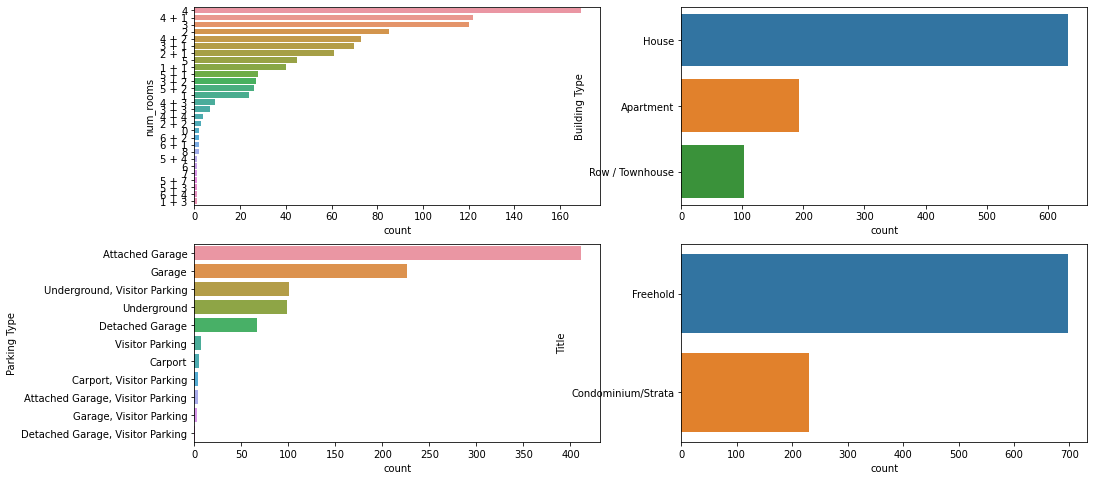

In [28]:
f,ax=plt.subplots(2,2,figsize=(16,8))
sns.countplot(y = 'num_rooms',data=df_realtor_cat,order = df_realtor_cat['num_rooms'].value_counts().index, ax = ax[0,0])
sns.countplot(y = 'Building Type',data=df_realtor_cat,order = df_realtor_cat['Building Type'].value_counts().index, ax = ax[0,1])
sns.countplot(y = 'Parking Type',data=df_realtor_cat,order = df_realtor_cat['Parking Type'].value_counts().index, ax = ax[1,0])
sns.countplot(y = 'Title',data=df_realtor_cat,order = df_realtor_cat['Title'].value_counts().index, ax = ax[1,1])

plt.show()

We see that most houses around the Richmond Hill area have 4,4+1,3 bedrooms. Also we notice most of the listings are house listings and comparably small listings for apartment and townhouses. Of those houses that are listed, significant number of them have an attached garage.

**EDA for Numerical Data**

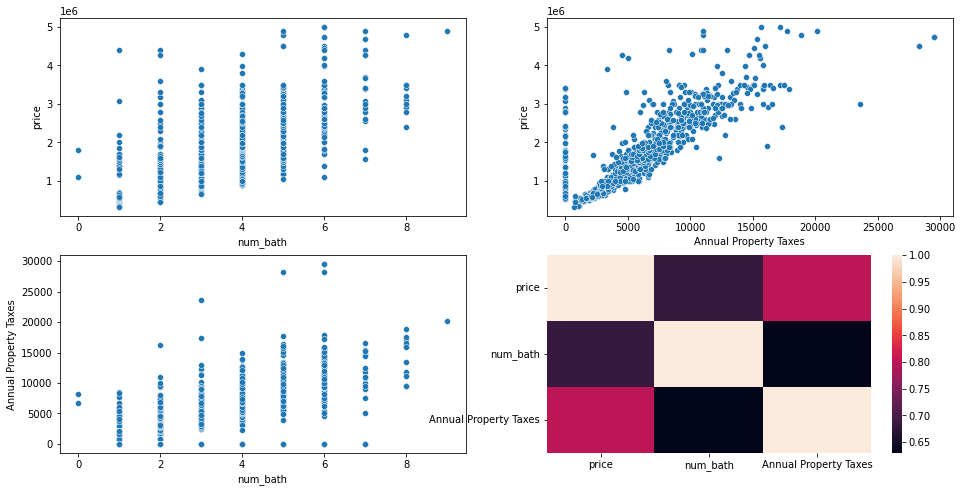

In [29]:
f,ax=plt.subplots(2,2,figsize=(16,8))
sns.scatterplot(data=df_realtor_num, x="num_bath", y="price",ax = ax[0,0])
sns.scatterplot(data=df_realtor_num, x="Annual Property Taxes", y="price",ax = ax[0,1])
sns.scatterplot(data=df_realtor_num, x="num_bath", y="Annual Property Taxes",ax = ax[1,0])
sns.heatmap(df_realtor_num.corr(), ax = ax[1,1])

We see that there is some correlation between the price and the annual property taxes. This is obvious as more expensive houses tend to get taxed more. One abnormality we see here is that some of the annual property taxes information is 0 for some listings. This could have misleading information when looking at the average for certain regions. We should therefore replace them with the median. 

In [30]:
df_realtor.groupby(['Building Type'])['Annual Property Taxes'].median()

Building Type
Apartment          2173.225
House              7000.000
Row / Townhouse    3681.670
Name: Annual Property Taxes, dtype: float64

In [31]:
df_realtor.loc[df_realtor['Building Type'] == "Apartment",'Annual Property Taxes'] = df_realtor.loc[df_realtor['Building Type'] == "Apartment",'Annual Property Taxes'].replace(0,2173.23)
df_realtor.loc[df_realtor['Building Type'] == "House",'Annual Property Taxes'] = df_realtor.loc[df_realtor['Building Type'] == "House",'Annual Property Taxes'].replace(0,7000.00)
df_realtor.loc[df_realtor['Building Type'] == "Row / Townhouse",'Annual Property Taxes'] = df_realtor.loc[df_realtor['Building Type'] == "Row / Townhouse",'Annual Property Taxes'].replace(0,3681.67)

In [32]:
df_realtor

,address,price,num_rooms,num_bath,Property Type,Building Type,Community Name,Title,Annual Property Taxes,Parking Type
0,"#708 -480 MCLEVIN AVE Toronto, Ontario M1B5N9",535000,2,2.0,Single Family,Apartment,Malvern,Condominium/Strata,1173.15,"Underground, Visitor Parking"
1,"#2414 -8960 JANE ST Vaughan, Ontario L4K2M9",659999,1 + 1,2.0,Single Family,Apartment,Concord,Condominium/Strata,2173.23,Underground
2,"#202 -9017 LESLIE ST Richmond Hill, Ontario L4...",508000,1,1.0,Single Family,Apartment,Beaver Creek Business Park,Condominium/Strata,1516.97,Underground
3,"#PH 11 -25 SILVER SPRINGS BLVD Toronto, Ontari...",475000,1 + 1,1.0,Single Family,Apartment,L'Amoreaux,Condominium/Strata,1496.98,Underground
4,"#1922 -8960 JANE ST Vaughan, Ontario",599900,1 + 1,1.0,Single Family,Apartment,Concord,Condominium/Strata,2173.23,Underground
...,...,...,...,...,...,...,...,...,...,...
1056,"20 CLARIDGE DR Richmond Hill, Ontario L4C6H1",4800000,5 + 2,8.0,Single Family,House,South Richvale,Freehold,18830.12,Attached Garage
1057,"68 MAPLE GROVE AVE Richmond Hill, Ontario L4E2X2",3999888,4 + 1,6.0,Single Family,House,Oak Ridges,Freehold,15837.87,Attached Garage
1059,"4665 19TH AVE Markham, Ontario L6C1M3",4280000,3,2.0,Single Family,House,Rural Markham,Freehold,4556.00,Attached Garage
1061,"303 TORREY PINES RD Vaughan, Ontario L4H3X3",3670000,5,7.0,Single Family,House,Kleinburg,Freehold,15208.00,Garage


# Feature Engineering

For feature engineering, we first need to extract the number of rooms and number of dens from num_rooms column. If there is a den then it comes after the + sign. We can extract 2 new columns from this. Number of bedrooms and number of den.

In [33]:
df_realtor['num_beds'] = df_realtor['num_rooms'].apply(lambda x: x.split("+")[0] if len(x.split("+")) > 1 else x)
df_realtor['num_den'] = df_realtor['num_rooms'].apply(lambda x: x.split("+")[1] if len(x.split("+")) > 1 else 0)

Now that we extracted the rooms information from num_rooms, we can drop that column and change the datatype of the new columns to integer.

In [34]:
df_realtor = df_realtor.drop(['num_rooms'],axis = 1)
df_realtor['num_beds'] = df_realtor['num_beds'].astype('int64')
df_realtor['num_den'] = df_realtor['num_den'].astype('int64')

Since the address is meaningless, we will try to extract the city from the address column.

In [35]:
df_realtor['city'] = df_realtor['address'].apply(lambda x: x.split(",")[0].split(" ")[-1])
df_realtor.loc[df_realtor['city'] == "Hill", 'city'] = "Richmond Hill"

In [36]:
df_realtor

,address,price,num_bath,Property Type,Building Type,Community Name,Title,Annual Property Taxes,Parking Type,num_beds,num_den,city
0,"#708 -480 MCLEVIN AVE Toronto, Ontario M1B5N9",535000,2.0,Single Family,Apartment,Malvern,Condominium/Strata,1173.15,"Underground, Visitor Parking",2,0,Toronto
1,"#2414 -8960 JANE ST Vaughan, Ontario L4K2M9",659999,2.0,Single Family,Apartment,Concord,Condominium/Strata,2173.23,Underground,1,1,Vaughan
2,"#202 -9017 LESLIE ST Richmond Hill, Ontario L4...",508000,1.0,Single Family,Apartment,Beaver Creek Business Park,Condominium/Strata,1516.97,Underground,1,0,Richmond Hill
3,"#PH 11 -25 SILVER SPRINGS BLVD Toronto, Ontari...",475000,1.0,Single Family,Apartment,L'Amoreaux,Condominium/Strata,1496.98,Underground,1,1,Toronto
4,"#1922 -8960 JANE ST Vaughan, Ontario",599900,1.0,Single Family,Apartment,Concord,Condominium/Strata,2173.23,Underground,1,1,Vaughan
...,...,...,...,...,...,...,...,...,...,...,...,...
1056,"20 CLARIDGE DR Richmond Hill, Ontario L4C6H1",4800000,8.0,Single Family,House,South Richvale,Freehold,18830.12,Attached Garage,5,2,Richmond Hill
1057,"68 MAPLE GROVE AVE Richmond Hill, Ontario L4E2X2",3999888,6.0,Single Family,House,Oak Ridges,Freehold,15837.87,Attached Garage,4,1,Richmond Hill
1059,"4665 19TH AVE Markham, Ontario L6C1M3",4280000,2.0,Single Family,House,Rural Markham,Freehold,4556.00,Attached Garage,3,0,Markham
1061,"303 TORREY PINES RD Vaughan, Ontario L4H3X3",3670000,7.0,Single Family,House,Kleinburg,Freehold,15208.00,Garage,5,0,Vaughan


In [37]:
df_realtor['city'].value_counts()

Richmond Hill             283
Markham                   249
Vaughan                   218
Toronto                    58
Aurora                     40
Whitchurch-Stouffville     38
King                       37
available                   3
Pickering                   1
Brampton                    1
Name: city, dtype: int64

We see that everything is working except we should get rid of the rows with "available" as city. This probably happened because of the vacant land advertisements. Also, we can get rid of the listing from Pickering and Brampton because there are only 1 of each which indicates that they are outliers.

In [38]:
df_realtor = df_realtor.drop(df_realtor[df_realtor['city'] == "available"].index)
df_realtor = df_realtor.drop(df_realtor[df_realtor['city'] == "Pickering"].index)
df_realtor = df_realtor.drop(df_realtor[df_realtor['city'] == "Brampton"].index)

In [39]:
df_realtor['city'].value_counts()

Richmond Hill             283
Markham                   249
Vaughan                   218
Toronto                    58
Aurora                     40
Whitchurch-Stouffville     38
King                       37
Name: city, dtype: int64

Now we are going to add a column visitors to see whether a listing has visitors parking.

In [40]:
df_realtor['Parking Type'].value_counts()

Attached Garage                     409
Garage                              224
Underground, Visitor Parking        101
Underground                          99
Detached Garage                      66
Visitor Parking                       7
Carport                               5
Carport, Visitor Parking              4
Attached Garage, Visitor Parking      4
Garage, Visitor Parking               3
Detached Garage, Visitor Parking      1
Name: Parking Type, dtype: int64

7 of the parking types are visitors, which means they do not have their own parking space. Therefore, I should change these to No Parking in Parking Types column and extract visitor parking information.

In [41]:
df_realtor['visitors'] = df_realtor['Parking Type'].apply(lambda x: "Yes" if ((len(x.split(",")) > 1)  or (x == "Visitor Parking")) else "No")
df_realtor['Parking Type'] = df_realtor['Parking Type'].apply(lambda x: x.split(",")[0] if len(x.split(",")) > 1 else x)
df_realtor['Parking Type'] = df_realtor['Parking Type'].apply(lambda x: "No Private Parking" if x == "Visitor Parking" else x)

In [42]:
df_realtor['Parking Type'].value_counts()

Attached Garage       413
Garage                227
Underground           200
Detached Garage        67
Carport                 9
No Private Parking      7
Name: Parking Type, dtype: int64

In [43]:
df_realtor.to_csv('/content/gdrive/My Drive/realtor.ca/realtor_vis.csv')

# Data Visualization in Tableau

https://public.tableau.com/views/Realtor_caAnalysisDashboard/Realtor_caAnalysis?:language=en-US&:display_count=n&:origin=viz_share_link


#Summary of EDA/dashboard findings
# Cities with most listings per Building Type

*   Top 3 areas with most houses in order: 1) Richmond Hill. 2) Markham. 3) Vaughan
*   Top 3 areas with most apartment in order: 1) Vaughan. 2) Markham. 3) Richmond Hill
*   Top 3 areas with most townhouses in order: 1) Richmond Hill. 2) Markham. 3) Vaughan

# Distribution of Building Types per City 
* In Aurora: Approximately 85% of listings are houses, 15% of listings are townhouses, and 0% of listings are apartments.
* In King: Approximately 94% of listings are houses, 3% of listings are townhouses, and 3% of listings are apartments.
* In Markham: Approximately 65% of listings are houses, 12% of listings are townhouses, and 21% of listings are apartments.
* In Richmond Hill: Approximately 70% of listings are houses, 12% of listings are townhouses, and 17% of listings are apartments.
* In Toronto: Approximately 43% of listings are houses, 8% of listings are townhouses, and 48% of listings are apartments.
* In Vaughan: Approximately 64% of listings are houses, 10% of listings are townhouses, and 25% of listings are apartments.
* In Whitechurch-Stouffville: Approximately 76% of listings are houses, 6% of listings are townhouses, and 17% of listings are apartments.

#Average Annual Property Taxes per City
* King has the highest average property tax for all types of buildings.

#Visitors Parking
* We see that Richmond Hill has the highest absence of Visitors Parking. This may be due to the fact that visitors parking only exist in apartments, which Richmond Hill lacks. Following Richmond Hill comes Markham and Vaughan.

#Community Cluster Distribution
* We see that Markham has a lot of listings from different small communities within the city. There are a lot of diversification of community within Markham.
* On the other hand, for Richmond Hill and Vaughan, there are less variety of communities but have much more abundent listings within the same community. These information can be useful if a potential buyer wants to buy multiple property within a certain vicinity.
